# Introduction

You might find it weird that we're sticking a chapter on optimization here.
If you're following the tutorials in sequence,
then you've probably already been optimizing over the parameters 
of ten or more machine learning models.
You might consider yourself an old pro.
In this chapter we'll supply some depth to complement your experience.

We need to think seriously about optimization matters for several reasons.
First, we want optimizers to be fast.
Optimizing complicated models with millions of parameters can take upsettingly long.
You might have heard of researchers training deep learning models
for many hours, days, or even weeks. 
They probably weren't exaggerating. 
Second, optimization is how we choose our parameters.
So the performance (e.g. accuracy) of our models
depends entirely on the quality of the optimizer.


![](../img/training_model.png)

<!--


## Why optimization matters

Indeed, model training is often considered as the most challenging stage for a deep learning task. Essentially, for most machine learning models, the goal of training is to find values of model parameters that minimize a pre-defined loss function. 

Consider the task of classifying an image as either a cat or a dog. Suppose that the training data set consists of images labeled as cats and dogs. With extracted features such as pixel information representing each image, a deep learning model transforms such input features into the likelihoods of being a cat and a dog. Such transformations are essentially linear and nonlinear functions of both input features and model parameters. Note that the input features are given, while the model parameter values are unknown beforehand and shall be obtained after model training.

We can train this model with maximum likelihood estimation. The idea is to maximize the joint likelihood of observing all the labeled cats and dogs in the training data set as transformations from the input image features and model parameters. Equivalently, we can define the loss function as the negative log likelihood of the observations in the training data set. We want to find the optimal values of the model parameters that minimize the loss function. To achieve this goal, we rely on optimization algorithms to find such model parameter values. Thus, it is fair to say that optimization plays a key role in training a deep learning model. 
-->

## Challenges in optimization

The pre-defined loss function in the learning problem is called the objective function for optimization. Conventionally, optimization considers a minimization problem.
Any maximization problem can be trivially converted to an equivalent minimization problem
by flipping the sign fo the objective function. 
Optimization is worth studying both because it's essential to learning.
It's also worth studying because it's an area where progress is being made,
and smart choices can lead to superior performance. 
In other words, even fixing all the other modeling decisions,
figuring out how to optimize the parameters is a formidable challenge. 
We'll briefly describe some of the issues that make optimization hard, especially for neural networks.

## Local minima

An objective function $f(x)$ may have a local minimum $x$, where $f(x)$ is smaller at $x$ than at the neighboring points of $x$. If $f(x)$ is the smallest value that can be obtained in the entire domain of $x$, $f(x)$ is a global mininum.
The following figure demonstrates examples of local and global minima for the function: 
$$f(x) = x \cdot \text{cos}(\pi x), \qquad -1.0 \leq x \leq 2.0.$$


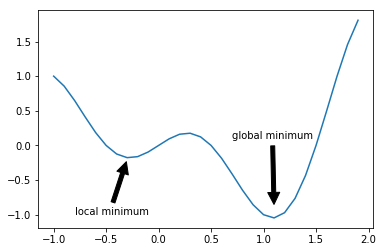

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * np.cos(np.pi * x)

x = np.arange(-1.0, 2.0, 0.1)
fig = plt.figure()
subplt = fig.add_subplot(111)
subplt.annotate('local minimum', xy=(-0.3, -0.2), xytext=(-0.8, -1.0),
            arrowprops=dict(facecolor='black', shrink=0.05))
subplt.annotate('global minimum', xy=(1.1, -0.9), xytext=(0.7, 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(x, f(x))
plt.show()

## Analytic vs approximate solutions

Ideally, we'd find the optimal solution $x^*$ that globally minimizes an objective function. 
For instance, the function $f(x) = x^2$ 
has a global minimum solution at $x^* = 0$. 
We can obtain this solution analytically.
Another way of saying this is that there exists a *closed-form* solution.
This just means that we can analyze the equation for the function 
and produce an exact solution directly. 
Linear regression, for example, has an analytic solution.
To refresh your memory, in linear regression we build a predictor of the form:
$$\mathbf{\hat{y}} = X \mathbf{w}$$

We ignored the intercept term $b$ here, but that can be handled by simply appending a column of all 1s
to the design matrix X.

And we want to solve the following minimization problem
$$\min_{\mathbf{w}} \mathcal{L}(\mathbf{y},\hat{\mathbf{y}}) = ||\mathbf{y} - X\mathbf{w} ||^2_2$$

As a refresher, that's just the sum of the squared differences between our predictions and the ground truth answers.
$$ \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i)^2 $$

Because we know that this function is quadratic, we know that it has a single critical point where the derivative of the loss with respect to the weights $\mathbf{w}$ is equal to $0$.
Moreover, we know that the weights that minimize our loss constitute a critical point.
So our solution corresponds to the one setting of the weights that gives a derivative of $0$.
First, let's rewrite our loss function:
$$\mathcal{L}(\mathbf{y}, \mathbf{\hat{y}}) = (\mathbf{y}-X\mathbf{w})^T (\mathbf{y}-X\mathbf{w})$$

Now, setting the derivative of our loss to 0 gives the following equation:
$$\frac
{\partial 
\mathcal{L}(\mathbf{y}, \mathbf{\hat{y}})
}
{\partial \mathbf{w}} 
= -2(X)^T (\mathbf{y}-X\mathbf{w}) = 0$$

We can now simplify these equations to find the optimal setting of the parameters $\mathbf{w}$:

$$
\begin{align}
-2X^T \mathbf{y} + 2X^T X \mathbf{w} &= 0 \\
X^T X \mathbf{w} & = X^T \mathbf{y}\\
\mathbf{w} & = (X^T X)^{-1} X^T \mathbf{y}
\end{align}
$$

You might have noticed that we assumed that the matrix $X^T X$ can be inverted. 
If you take this fact for granted, 
then it should be clear that we can recover the exact optimal value $\mathbf{w}^*$
exactly. 
No matter what values the data ${X, \mathbf{y}}$ takes
we can produce an exact answer by computing just one matrix multiplication,
one matrix inversion, and two matrix-vector products.

## Numerical optimization

However, in practice and for the most interesting models,
we usually can't find such analytical solutions. 
Even for logistic regression, possibly the second simplest model considered in this book,
we don't have any exact solution.
When we don't have an analytic solution, 
we need to resort to a numerical solution.
A numerical solution usually involves starting with some guess of the objective-minimizing 
setting of all the parameters, and successively improving the parameters in an iterative manner. 
The most popular optimization techniques of this variety are variants of gradient descent (GD).
In the next notebook, we'll take a [deep dive into gradient descent and stochastic gradient descent (SGD)](./gd-sgd.ipynb).
Depending on the optimizer you use, iterative methods may take a long time to converge on a good answer.

For many problems, even if they don't have an analytic solution, they may have only one minima.
An especially convenient class of functions are the *convex* functions. 
These are functions with a uniformly positive second derivative.
They have no local minima and are especially well-suited to efficient optimization.
Unfortunately, this is a book about neural networks. 
And neural networks are not in general convex. 
Moreover, they have abundant local minima.
With numerical methods, it may not be possible to find the global minimizer 
of an objective function. 
For non-convex functions, a numerical method often halts
around local minima that are not necessarily the global minima. 

## Saddle points

Saddle points are another challenge for optimizers. 
Even though these points are not local minima, 
they are points where the gradient is equal to zero. 
For high dimensional models, saddle points are typically more numerous than local minima.
We depict a saddle point example in one-dimensional space below.

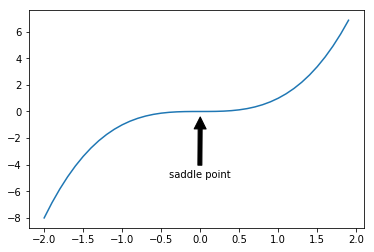

In [2]:
x = np.arange(-2.0, 2.0, 0.1)
fig = plt.figure()
subplt = fig.add_subplot(111)
subplt.annotate('saddle point', xy=(0, -0.2), xytext=(-0.4, -5.0), 
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(x, x**3)
plt.show()

Many optimization algorithms, like Newton's method, are designed to be attracted to critical points, including minima and saddle points.
Since saddle points are generally common in high-dimensional space, 
some optimization algorithms, such as Newton's method, 
may fail to train deep learning models effectively 
as they may get stuck in saddle points.
Another challenging scenarios for neural networks is that there may be large, 
flat regions in parameters space that correspond to bad values of the objective function.

### Challenges due to machine precision 

Even for convex functions, where all minima are global minima, it may still be hard to find the precise optimal solutions. For one, the accuracy of any solution can be limited by the machine precision.

In computers, numbers are represented in a discrete manner. The accuracy of a floating-point system is characterized by a quantity called machine precision. For IEEE binary floating-point systems, 

* single precision = $2^{-24}$ (about 7 decimal digits of precision)
* double precision = $2^{-53}$ (about 16 decimal digits of precision).

In fact, the precision of a solution to optimization can be worse than the machine precision. To demonstrate that, consider a function $f: \mathbb{R} \rightarrow \mathbb{R}$, its Taylor series exansion is

$$f(x + \epsilon) = f(x) + f'(x)\epsilon + \frac{f''(x)}{2}\epsilon^2 + \mathcal{O}(\epsilon^3)$$

where $\epsilon$ is small. Denote the global optimum solution as $x^*$ for minimizing $f(x)$. It usually holds that 

$$f'(x^*) = 0 \quad \text{and} \quad f''(x^*) \neq 0.$$

Thus, for a small value $\epsilon$, we have

$$f(x^* + \epsilon) \approx f(x^*) + \mathcal{O}(\epsilon^2),$$

where the coefficient term of $\mathcal{O}(\epsilon^2)$ is $f''(x)/2$. 
This means that a small change of order $\epsilon$ in the optimum solution $x^*$ 
will change the value of $f(x^*)$ in the order of $\epsilon^2$. 
In other words, if there is an error in the function value, 
the precision of the solution value is constrained 
by the order of the square root of that error. 
For example, if the machine precision is $10^{-8}$, 
the precision of the solution value is only 
in the order of $10^{-4}$, 
which is much worse than the machine precision.

## Optimality isn't everything

Although finding the precise global optimum solution to an objective function is hard, 
it is not always necessary for deep learning. 
To start with, we care about test set performance. 
So we may not even want to minimize the error on the training set to the lowest possible value.
Moreover, finding a suboptimal minimum of a great model can still be better than finding the true global minimum of a lousy model. 

Many algorithms have solid theoretical guarantees of convergence to global minima, but these guarantees often only hold for functions that are convex. 
In the old days, most researchers tried to avoid non-convex optimizations due to the lack of guarantees.
Doing gradient descent without a theoretical guarantee of convergence was  considered unprincipled.
However, the practice is supported by a large body of empirical evidence. 
The state of the art models in computer vision, natural language processing, and speech recognition, for example,
all rely on applying numerical optimizers to non-convex objective functions.
Machine learners now often have to choose between those methods that are beautiful and those that work.
In the next sections we'll try to give you some more background on the field of optimisation 
and a deeper sense of the state of the art techniques for training neural networks.


## Next
[Gradient descent and stochastic gradient descent from scratch](../chapter06_optimization/gd-sgd.ipynb)

For whinges or inquiries, [open an issue on  GitHub.](https://github.com/zackchase/mxnet-the-straight-dope)